## Statistik Komputasi Regresi Linier

Sumber Belajar
- https://www.w3schools.com/python/python_ml_multiple_regression.asp
- https://datatofish.com/multiple-linear-regression-python/
- https://www.pluralsight.com/guides/interpreting-data-using-statistical-models-python
- https://www.statsmodels.org/stable/index.html
- https://statmat.id/regresi-linier-berganda

### Langkah 1 Deklarasi Pustaka

In [1]:
# Deklarasi Pustaka
import datetime # => format custom tanggalan
import numpy as np # => menghitung numerik
import pandas as pd # => membuat dataset menjadi data frame
import matplotlib.pyplot as plt # => viisualisasi datanya

# => proses analisa statistik
import scipy.stats

# => proses model prediksi secara statistik
import statsmodels.api as sm
import statsmodels.formula.api as smf

# => proses model prediksi secara Ai
from sklearn.linear_model import LinearRegression

### Langkah 2 Masukan Data

In [2]:
# Input Data
#df = pd.read_csv("D:/bahan-ajar-ML-v1/dataset/dataset_dummy_regresi.csv")
df = pd.read_csv("../dataset/dataset_dummy_regresi.csv")

In [3]:
# Melihat karakteristik dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tahun   24 non-null     object 
 1   x1      24 non-null     float64
 2   x2      24 non-null     float64
 3   y       24 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 900.0+ bytes


In [4]:
# Melihat isi dataset
df.tail()

,tahun,x1,x2,y
19,2016-5-1,1.75,6.1,866
20,2016-4-1,1.75,5.9,876
21,2016-3-1,1.75,6.2,822
22,2016-2-1,1.75,6.2,704
23,2016-1-1,1.75,6.1,719


### Langkah 3 Kenali Bentuk Data

In [5]:
# Berdasarkan dataset tersebut, diketahui bahwa kolom tahun masih berupa objek
# oleh karena itu, kita convert menjadi tanggal untuk memudahkan analisa time series

# Proses merubah bentuk data objek ke datetime
df['tahun']= pd.to_datetime(df['tahun'])

In [6]:
# Melihat karakteristik dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   tahun   24 non-null     datetime64[ns]
 1   x1      24 non-null     float64       
 2   x2      24 non-null     float64       
 3   y       24 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 900.0 bytes


In [7]:
# Melihat isi dataset
df.tail()

,tahun,x1,x2,y
19,2016-05-01,1.75,6.1,866
20,2016-04-01,1.75,5.9,876
21,2016-03-01,1.75,6.2,822
22,2016-02-01,1.75,6.2,704
23,2016-01-01,1.75,6.1,719


In [8]:
## Agar mempermudah dalam melakukan analisa time series.
## Maka kita agregasikan data bulanan menjadi data quater
                        
# Langkah 1 agregasi data (index data berdasarkan bulan)
df_copy = df.copy()
df_copy = df_copy.set_index("tahun")

# Langkah 2 kelompokan data per-4 bulan sekali
df_copy = df_copy.resample('4M', closed='left').sum()
df_copy

C:\Users\lunox\AppData\Local\Temp\ipykernel_16800\3286026071.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_copy = df_copy.resample('4M', closed='left').sum()


,x1,x2,y
tahun,,,
2016-04-30,7.00,24.4,3121
2016-08-31,7.00,24.5,3670
2016-12-31,7.25,23.8,3913
2017-04-30,8.50,22.7,4531
2017-08-31,9.75,22.0,4939
2017-12-31,10.25,21.2,5508


### Langkah 3.1 Kenali bentuk data per-variabel secara time series

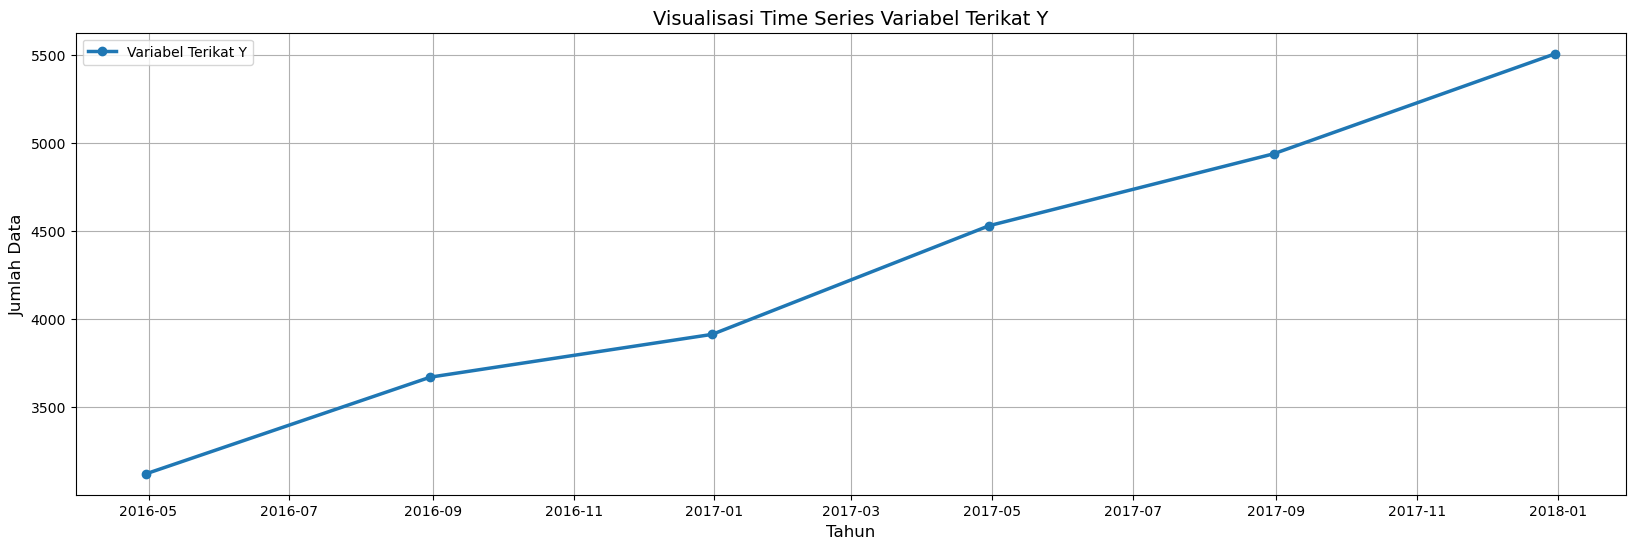

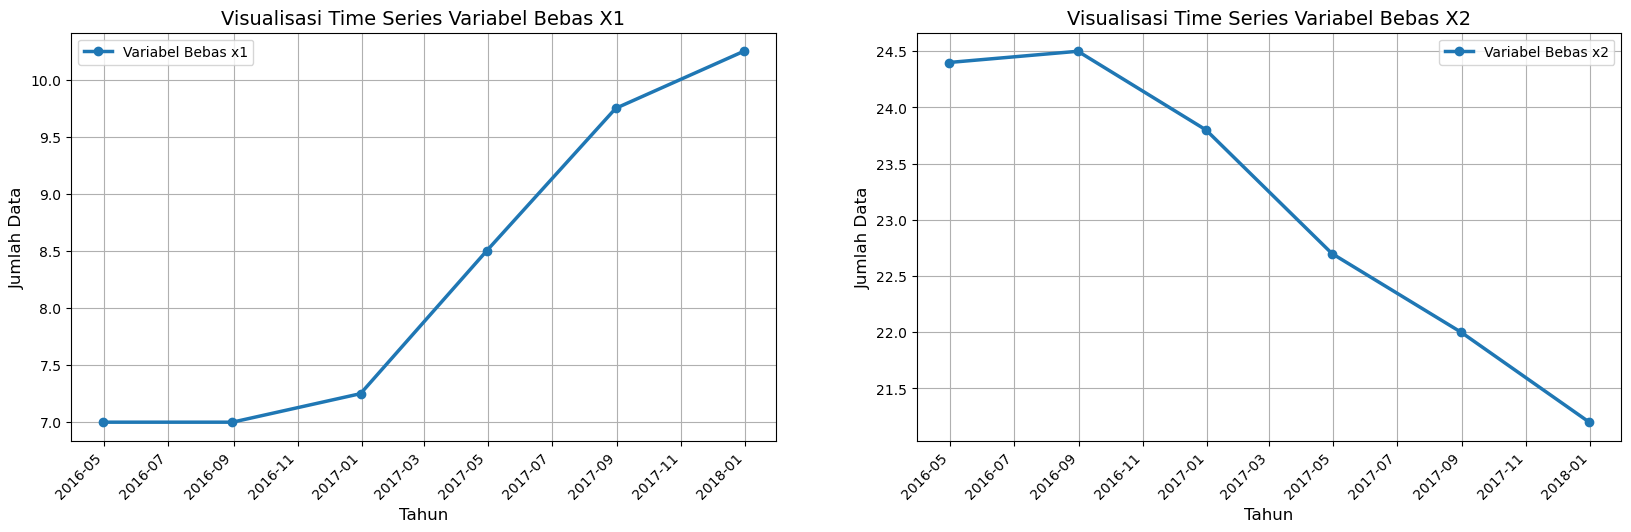

In [9]:
# Melihat pergerakan variabel terikat secara time series

# membuat frame
fig, ax = plt.subplots(figsize = (20,6))

# Membuat plot 1
ax.plot(df_copy.index.values, df_copy["y"], color='tab:blue', marker='o', label='Variabel Terikat Y', linewidth=2.5)

# membuat label-label plot 2
ax.set_title('Visualisasi Time Series Variabel Terikat Y', fontsize=14)
ax.set_xlabel('Tahun', fontsize=12)
ax.set_ylabel('Jumlah Data', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True)

##------------------------------------------------------------------------------------------------------------
# Melihat pergerakan variabel bebas secara time series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))

# Mengelompokan kordinat x dalam bentuk tanggal
fig.autofmt_xdate()

# Membuat plot 2
ax1.plot(df_copy.index.values, df_copy["x1"], color='tab:blue', marker='o', label='Variabel Bebas x1', linewidth=2.5)

# membuat label-label plot 2
ax1.set_title('Visualisasi Time Series Variabel Bebas X1', fontsize=14)
ax1.set_xlabel('Tahun', fontsize=12)
ax1.set_ylabel('Jumlah Data', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True)


# Membuat plot 3
ax2.plot(df_copy.index.values, df_copy["x2"], color='tab:blue', marker='o', label='Variabel Bebas x2', linewidth=2.5)
                                       
# membuat label-label plot 3
ax2.set_title('Visualisasi Time Series Variabel Bebas X2', fontsize=14)
ax2.set_xlabel('Tahun', fontsize=12)
ax2.set_ylabel('Jumlah Data', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True)

# rotasi label x menjadi 45 derajat
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Menampilkan Hasil Visualisasi
plt.show()

### Langlah 3.2 Bentuk Data secara analisis linieritas (variabel bebas dengan variabel terikat)

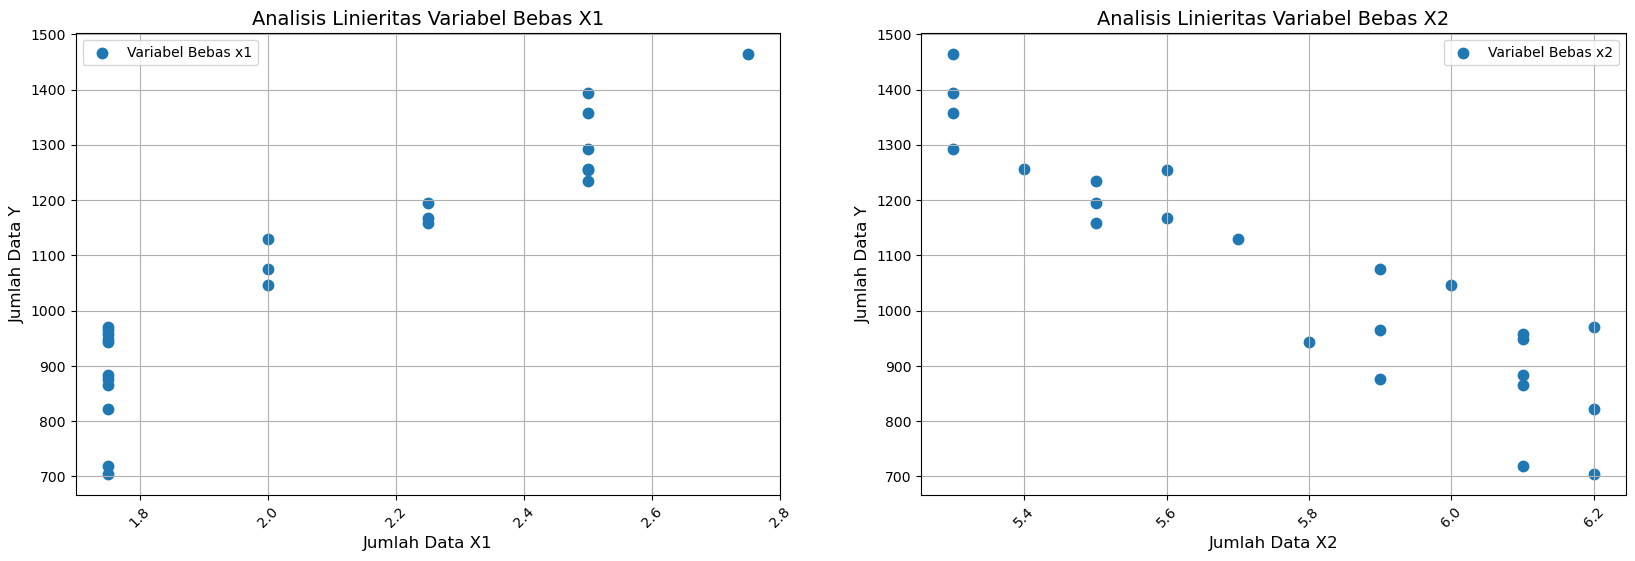

In [10]:
##------------------------------------------------------------------------------------------------------------
# Melihat pergerakan variabel bebas dengan variabel terikat
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))

# Membuat plot 2
ax1.scatter(df["x1"], df["y"], color='tab:blue', label='Variabel Bebas x1', linewidth=2.5)

# membuat label-label plot 2,
ax1.set_title('Analisis Linieritas Variabel Bebas X1', fontsize=14)
ax1.set_xlabel('Jumlah Data X1', fontsize=12)
ax1.set_ylabel('Jumlah Data Y', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True)

# Membuat plot 3\r\n",
ax2.scatter(df["x2"], df["y"], color='tab:blue', label='Variabel Bebas x2', linewidth=2.5)

# membuat label-label plot 3
ax2.set_title('Analisis Linieritas Variabel Bebas X2', fontsize=14)
ax2.set_xlabel('Jumlah Data X2', fontsize=12)
ax2.set_ylabel('Jumlah Data Y', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True)

# rotasi label x menjadi 45 derajat
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Menampilkan Hasil Visualisasi
plt.show()

### Langkah 3.3 Bentuk Data secara analisis korelasi dengan Pearson

In [11]:
# Membuat korelasi pearson menggunakan lib pandas
corr = df.corr()
corr

,tahun,x1,x2,y
tahun,1.000000,0.934092,-0.935074,0.988095
x1,0.934092,1.000000,-0.925814,0.935793
x2,-0.935074,-0.925814,1.000000,-0.922338
y,0.988095,0.935793,-0.922338,1.000000


In [12]:
# Membuat korelasi pearson menggunakan lib scipy
print(scipy.stats.pearsonr(df["x1"], df["y"]))
print(scipy.stats.pearsonr(df["x2"], df["y"]))

PearsonRResult(statistic=0.9357932222393663, pvalue=1.953974544190117e-11)
PearsonRResult(statistic=-0.9223375779383673, pvalue=1.4867135372874748e-10)


### Hipotesa Awal
- Nilai Variabel bebas dan terikiat berbentuk data treen
- Korelasi antara variabel bebas dan terikat memiliki hubungan yg sangat kuat
- Antara sesama variabel bebas memiliki korelasi yag kuat
- Sehingga metode prediksi dapat dilakukan dengan metode regresi

### Regresi Linier via Statsmodel + OLS

- Nilai Y dipengaruhi oleh X1

In [13]:
# Membuat model regresi linier sederhana
model_lin = sm.OLS.from_formula("y ~ x1", data=df)
result_lin = model_lin.fit()

# Menampilkan hasil regresi
print(result_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     155.0
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.95e-11
Time:                        19:19:15   Log-Likelihood:                -136.94
No. Observations:                  24   AIC:                             277.9
Df Residuals:                      22   BIC:                             280.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -99.4643     95.210     -1.045      0.3

- Nilai Y dipengaruhi oleh X2

In [14]:
# Membuat model regresi linier sederhana
model_lin = sm.OLS.from_formula("y ~ x2", data=df)
result_lin = model_lin.fit()

# Menampilkan hasil regresi
print(result_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.4
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.49e-10
Time:                        19:19:15   Log-Likelihood:                -139.14
No. Observations:                  24   AIC:                             282.3
Df Residuals:                      22   BIC:                             284.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4471.3393    304.254     14.696      0.0

- Nilai Y dipengaruhi oleh X1 dan X2

In [15]:
# Membuat model regresi linier sederhana
model_lin = sm.OLS.from_formula("y ~ x1 + x2", data=df)
result_lin = model_lin.fit()

# Menampilkan hasil regresi
print(result_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           4.04e-11
Time:                        19:19:15   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1798.4040    899.248      2.000      0.0

### Regresi Linier via Scikit-Learn + OLS

- Memisahkan variabel-variabel nya

In [16]:
y = df["y"]

In [17]:
x1 = df["x1"]

In [18]:
x2 = df["x2"]

- transformasi bentuk data menjadi 2 Dimensi

In [19]:
# transformasi data x1
x1_matrix = x1.values.reshape(-1,1)
x1_matrix

array([[2.75],
       [2.5 ],
       [2.5 ],
       [2.5 ],
       [2.5 ],
       [2.5 ],
       [2.5 ],
       [2.25],
       [2.25],
       [2.25],
       [2.  ],
       [2.  ],
       [2.  ],
       [1.75],
       [1.75],
       [1.75],
       [1.75],
       [1.75],
       [1.75],
       [1.75],
       [1.75],
       [1.75],
       [1.75],
       [1.75]])

In [20]:
# transformasi data x2
x2_matrix = x2.values.reshape(-1,1)
x2_matrix

array([[5.3],
       [5.3],
       [5.3],
       [5.3],
       [5.4],
       [5.6],
       [5.5],
       [5.5],
       [5.5],
       [5.6],
       [5.7],
       [5.9],
       [6. ],
       [5.9],
       [5.8],
       [6.1],
       [6.2],
       [6.1],
       [6.1],
       [6.1],
       [5.9],
       [6.2],
       [6.2],
       [6.1]])

- Nilai Y dipengaruhi oleh X1

In [21]:
# membuat model regresi
reg1 = LinearRegression()
reg1.fit(x1_matrix,y)

LinearRegression()

In [22]:
# Menghitung intercept (bias x1)
reg1.intercept_

-99.46431881371655

In [23]:
# Menghitung slope x1
reg1.coef_

array([564.20389249])

In [24]:
# Menghitung determinasi. Jika y dipengaruhi oleh x1
reg1.score(x1_matrix,y)

0.8757089547891359

### Note ......
- rumus regresi Y = a + bX
- Y = hasil prediksi (variabel terikat)
- a = intercept
- b = slope
- X = koefisien regresi

- Nilai Y dipengaruhi oleh X2

In [25]:
# membuat model regresi
reg2 = LinearRegression()
reg2.fit(x2_matrix,y)

LinearRegression()

In [26]:
# Menghitung intercept (bias x2)
reg2.intercept_

4471.339321357286

In [27]:
# Menghitung slope x2
reg2.coef_

array([-588.96207585])

In [28]:
# Menghitung determinasi. Jika y dipengaruhi oleh x2
reg2.score(x2_matrix,y)

0.8507066076772138

### Note ......
- rumus regresi Y = a + bX
- Y = hasil prediksi (variabel terikat)
- a = intercept
- b = slope
- X = koefisien regresi

### Hasil Prediksi Regresi Linier

In [29]:
# Membuat prediksi regresi dengan inputan x1 dan x2

# cara 1. menggunakan persamaan y = a + bX
# y1_hat = reg1.coef_*x1_matrix+reg1.intercept_
# y2_hat = reg2.coef_*x2_matrix+reg2.intercept_

# cara 2. menggunakan fungsi predict
y1_hat = reg1.predict(x1_matrix)
y2_hat = reg2.predict(x2_matrix)

In [30]:
# Hasil prediksi y dengan variabel bebas x1
y1_hat

array([1452.09638554, 1311.04541242, 1311.04541242, 1311.04541242,
       1311.04541242, 1311.04541242, 1311.04541242, 1169.9944393 ,
       1169.9944393 , 1169.9944393 , 1028.94346617, 1028.94346617,
       1028.94346617,  887.89249305,  887.89249305,  887.89249305,
        887.89249305,  887.89249305,  887.89249305,  887.89249305,
        887.89249305,  887.89249305,  887.89249305,  887.89249305])

In [31]:
# membuktikan model regresi y ~ x1
reg1.predict([[1.75]])

array([887.89249305])

In [32]:
# Hasil prediksi y dengan variabel bebas x2
y2_hat

array([1349.84031936, 1349.84031936, 1349.84031936, 1349.84031936,
       1290.94411178, 1173.15169661, 1232.04790419, 1232.04790419,
       1232.04790419, 1173.15169661, 1114.25548902,  996.46307385,
        937.56686627,  996.46307385, 1055.35928144,  878.67065868,
        819.7744511 ,  878.67065868,  878.67065868,  878.67065868,
        996.46307385,  819.7744511 ,  819.7744511 ,  878.67065868])

In [33]:
# membuktikan model regresi y ~ x2
reg2.predict([[6.1]])

array([878.67065868])

In [34]:
# memasukan hasil prediksi ke dataset
df["y_x1"] = pd.DataFrame(y1_hat)
df["y_x2"] = pd.DataFrame(y2_hat)

In [35]:
df.tail()

,tahun,x1,x2,y,y_x1,y_x2
19,2016-05-01,1.75,6.1,866,887.892493,878.670659
20,2016-04-01,1.75,5.9,876,887.892493,996.463074
21,2016-03-01,1.75,6.2,822,887.892493,819.774451
22,2016-02-01,1.75,6.2,704,887.892493,819.774451
23,2016-01-01,1.75,6.1,719,887.892493,878.670659


### Visualsi Data Regresi linier

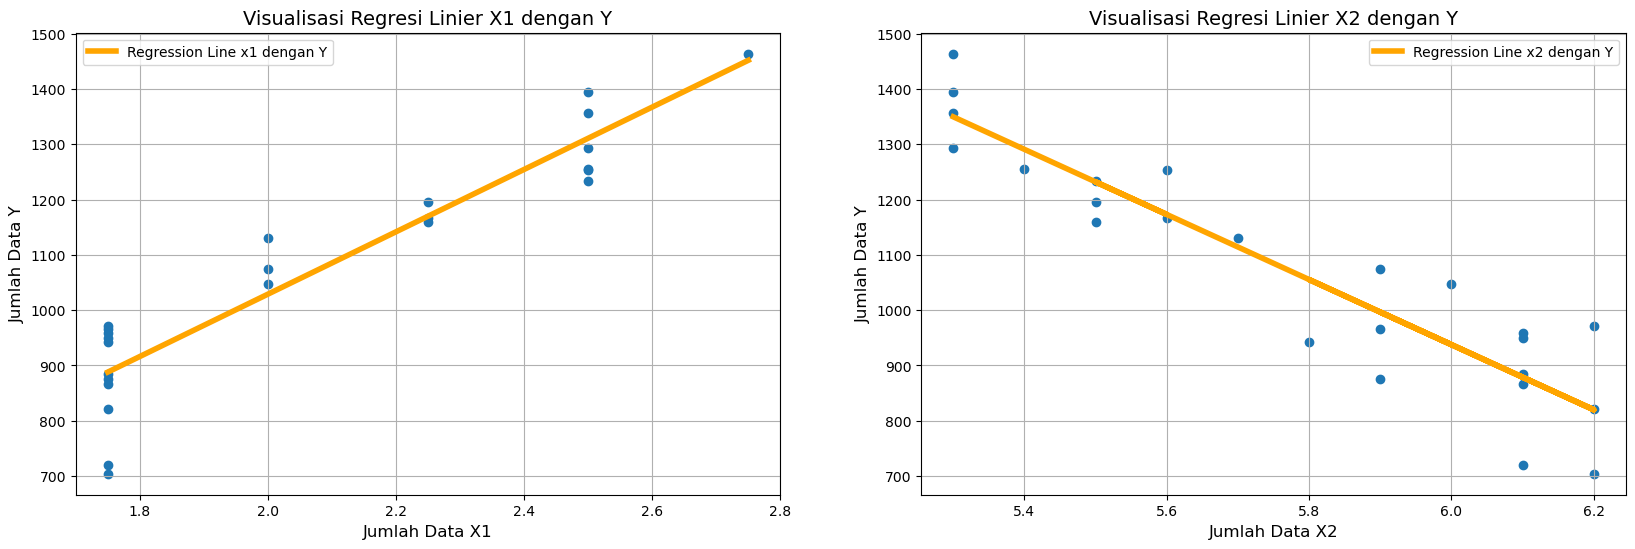

In [36]:
##------------------------------------------------------------------------------------------------------------
# Melihat pergerakan variabel bebas dengan variabel terikat
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))

# Membuat plot 1
ax1.scatter(x1,y)
ax1.plot(x1, y1_hat, color='orange', label='Regression Line x1 dengan Y', lw=4)

# membuat label-label plot 1\n",
ax1.set_title('Visualisasi Regresi Linier X1 dengan Y', fontsize=14)
ax1.set_xlabel('Jumlah Data X1', fontsize=12)
ax1.set_ylabel('Jumlah Data Y', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True)

# Membuat plot 2
ax2.scatter(x2,y)
ax2.plot(x2, y2_hat, color='orange', label='Regression Line x2 dengan Y', lw=4)

# membuat label-label plot 2\n",
ax2.set_title('Visualisasi Regresi Linier X2 dengan Y', fontsize=14)
ax2.set_xlabel('Jumlah Data X2', fontsize=12)
ax2.set_ylabel('Jumlah Data Y', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True)

# Menampilkan Hasil Visualisasi
plt.show()

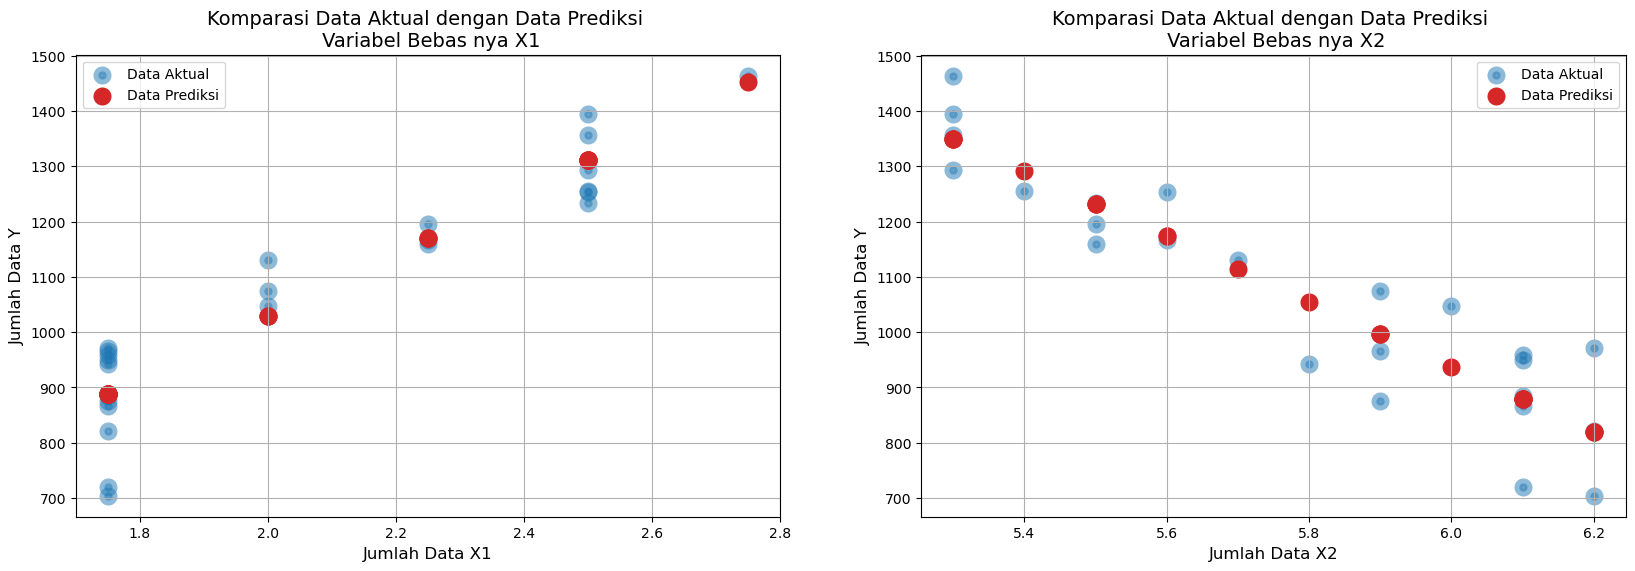

In [37]:
##------------------------------------------------------------------------------------------------------------
# Melihat pergerakan variabel bebas dengan variabel terikat
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))

# Membuat plot 1
ax1.scatter(df["x1"], df["y"], color='tab:blue', label='Data Aktual', linewidth=7, alpha=0.5)
ax1.scatter(df["x1"], df["y_x1"], color='tab:red', label='Data Prediksi', linewidth=7)

# membuat label-label plot 1
ax1.set_title('Komparasi Data Aktual dengan Data Prediksi \n Variabel Bebas nya X1', fontsize=14)
ax1.set_xlabel('Jumlah Data X1', fontsize=12)
ax1.set_ylabel('Jumlah Data Y', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True)

# Membuat plot 2
ax2.scatter(df["x2"], df["y"], color='tab:blue', label='Data Aktual', linewidth=7, alpha=0.5)
ax2.scatter(df["x2"], df["y_x2"], color='tab:red', label='Data Prediksi', linewidth=7)

# membuat label-label plot 2
ax2.set_title('Komparasi Data Aktual dengan Data Prediksi \n Variabel Bebas nya X2', fontsize=14)
ax2.set_xlabel('Jumlah Data X2', fontsize=12)
ax2.set_ylabel('Jumlah Data Y', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True)

# Menampilkan Hasil Visualisasi
plt.show()